In [27]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib import cm
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

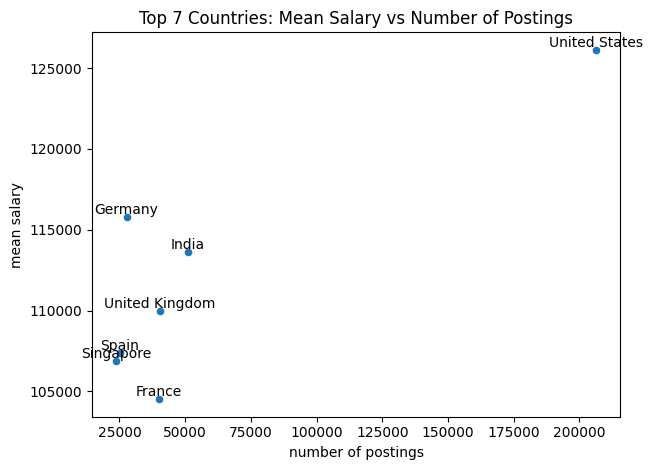

In [28]:
df_scatter = df.groupby('job_country').agg(
    job_count=('job_country', 'size'),
    job_mean_salary=('salary_year_avg', 'mean')
).dropna().sort_values(by='job_count', ascending=False).head(7)

df_scatter.plot(kind='scatter', x='job_count', y='job_mean_salary')
plt.title('Top 7 Countries: Mean Salary vs Number of Postings')
plt.xlabel('number of postings')
plt.ylabel('mean salary')
plt.tight_layout()



for i in range(len(df_scatter)):
    count = df_scatter['job_count'].iloc[i]
    salary = df_scatter['job_mean_salary'].iloc[i]
    name = df_scatter.index[i]
    plt.text(count, salary, name, ha='center', va='bottom')

plt.show()